In [1]:
file=open("datasets/minatobus-candump-2019-05-08_030759.log","r")

benign=open("datasets/benign_data.txt","w")
insertion=open("datasets/for_insertion.txt","w")
drop=open("datasets/for_drop.txt","w")
fuzzy=open("datasets/for_fuzzy.txt","w")

count=0

# line[25:33]

for line in file:
    count=count+1
    if count < 4000000:
        benign.write(line)
    elif 4000001 < count < 8000000:
        insertion.write(line)
    elif 8000001 < count < 12000000:
        drop.write(line)
    elif 12000001 < count < 16000000:
        fuzzy.write(line)

In [2]:
import random as rn
import shutil
import random
all_ids = ['0CF00400', '0CF00300', '18FEF100', '1CFF6F00', '18ECFF00', '18FF8800', '18FF8400',
           '18FEE500', '18F00029', '18FEF200', '18FF7F00', '1CFF7100', '18EBFF00', '18FF8200',
           '18FF8600', '18FEDC00', '1CFF7700', '18FF8900', '18FEDF00', '18FEE900', '18FF8700',
           '18FEE700', '1CFEB300', '18FEC100', '18FEEE00', '18ECFF29', '18EBFF29', '0C000027',
           '0C000F27', '18FEF111', '0CF00203', '0CF00327', '18FF8327', '0C002927', '18FF5027',
           '18F00503', '18FF5127', '18FEED11', '18FEE617', '1CFFAA27', '18EC0027', '18EB0027']

def drop_attack(attack_window,file_loc):
    at_win=random.uniform(0,attack_window)
    file = open(file_loc, "r")
    packets=[]
    for line in file:
        packets.append(line)
    file.close()
    drop_attack = open('datasets/prepared_attacks/drop_attack_'+str(attack_window)+'.txt', 'w')
    begin_time=float(packets[0][1:18])
    for i in range(len(packets)):
        time_stamp=float(packets[i][1:18])
        if time_stamp-begin_time >= at_win:
            drop_attack.write(packets[i][:-1]+' '+'D\n')
            begin_time=time_stamp
            at_win=random.uniform(0,attack_window)
        else:
            drop_attack.write(packets[i][:-1]+' '+'B\n')
    drop_attack.close()
    return None

def fuzzy_attack(attack_window,file_loc):
    at_win=random.uniform(0,attack_window)
    file = open(file_loc, "r")
    packets=[]
    for line in file:
        packets.append(line)
    file.close()
    fuzzy_attack = open('datasets/prepared_attacks/fuzzy_attack_'+str(attack_window)+'.txt','w')
    begin_time=float(packets[0][1:18])
    for i in range(len(packets)):
        time_stamp=float(packets[i][1:18])
        if time_stamp-begin_time >= at_win:
            fuzzy_attack.write(packets[i][:-1]+' '+'B\n')
            a = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']
            packet = rn.choice(a) + rn.choice(a) + rn.choice(a) + rn.choice(a) + rn.choice(a) + rn.choice(a) + rn.choice(
                a) + rn.choice(a) + \
                     rn.choice(a) + rn.choice(a) + rn.choice(a) + rn.choice(a) + rn.choice(a) + rn.choice(a) + rn.choice(
                a) + rn.choice(a)
            attack_frame=packets[i][:19]+ packets[rn.randint(0, len(packets))][19:-17] + packet + ' '+'F\n'
            fuzzy_attack.write(attack_frame)  # select random packet and insert it at this specific location
            begin_time=time_stamp
            at_win=random.uniform(0,attack_window)
        else:
            fuzzy_attack.write(packets[i][:-1]+' '+'B\n')
    fuzzy_attack.close()
    return None

def insertion_attack(attack_window,file_loc):
    at_win=random.uniform(0,attack_window)
    file = open(file_loc, "r")
    packets = []
    for line in file:
        packets.append(line)
    file.close()
    insertion_attack = open('datasets/prepared_attacks/insertion_attack_'+str(attack_window)+'.txt', 'w')
    begin_time = float(packets[0][1:18])
    for i in range(len(packets)):
        time_stamp = float(packets[i][1:18])
        if time_stamp - begin_time >= at_win:
            insertion_attack.write(packets[i][:-1]+' '+'B\n')
            attack_frame = packets[i][:19] + packets[rn.randint(0, len(packets) - 1)][19:-1] +' '+'I\n'
            insertion_attack.write(attack_frame)  # select random packet and insert it at this specific location
            begin_time = time_stamp
            at_win=random.uniform(0,attack_window)
        else:
            insertion_attack.write(packets[i][:-1]+' '+'B\n')
    insertion_attack.close()
    return None


def benign_data(raw_data,prepared_attacks):
    shutil.copy(raw_data,prepared_attacks)
    return None


if __name__=='__main__':
    attack_window=0.05

    benign_data("datasets/benign_data.txt", "datasets/prepared_attacks/benign_data.txt")
    drop_attack(attack_window,"datasets/for_drop.txt")
    fuzzy_attack(attack_window,"datasets/for_fuzzy.txt")
    insertion_attack(attack_window,"datasets/for_insertion.txt")


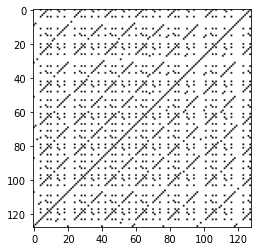

(128, 128)


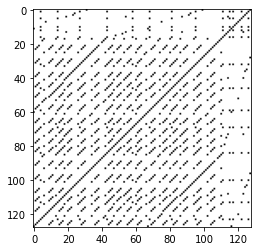

(128, 128)


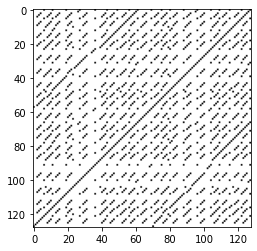

(128, 128)


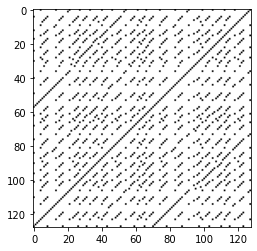

(128, 128)


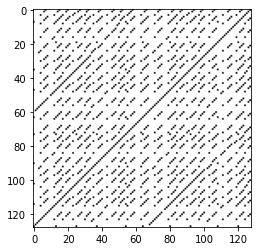

(128, 128)


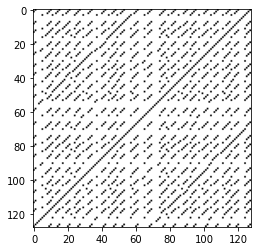

(128, 128)


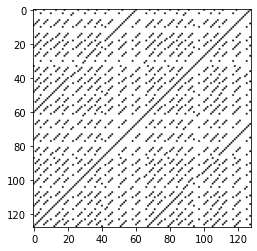

(128, 128)


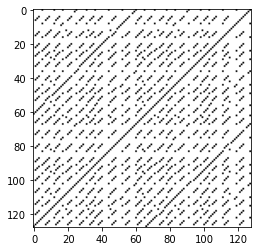

(128, 128)


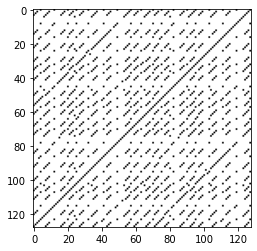

(128, 128)


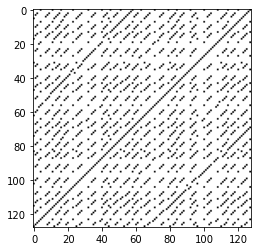

(128, 128)


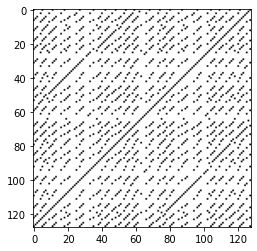

(128, 128)


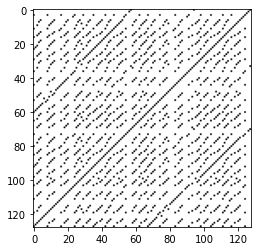

(128, 128)


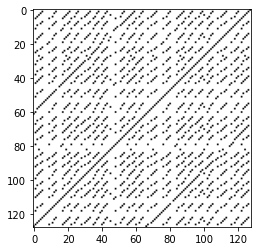

(128, 128)


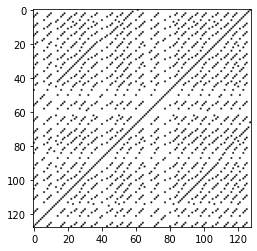

(128, 128)


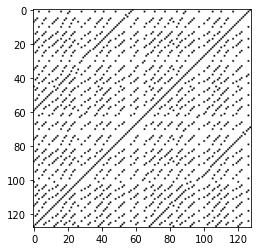

(128, 128)


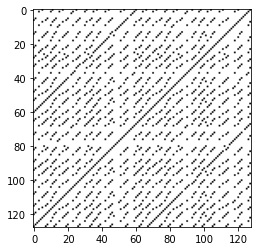

(128, 128)


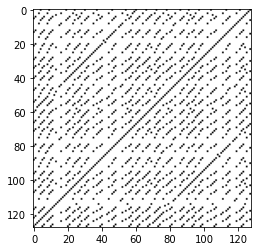

(128, 128)


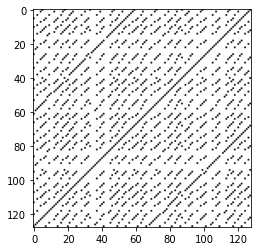

(128, 128)


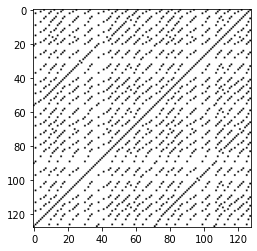

(128, 128)


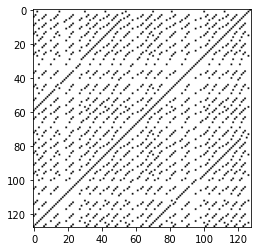

(128, 128)


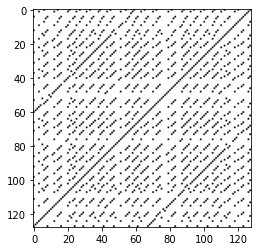

(128, 128)


In [4]:
import numpy as np
all_ids=['0CF00400', '0CF00300', '18FEF100', '1CFF6F00', '18ECFF00', '18FF8800', '18FF8400',
           '18FEE500', '18F00029', '18FEF200', '18FF7F00', '1CFF7100', '18EBFF00', '18FF8200',
           '18FF8600', '18FEDC00', '1CFF7700', '18FF8900', '18FEDF00', '18FEE900', '18FF8700',
           '18FEE700', '1CFEB300', '18FEC100', '18FEEE00', '18ECFF29', '18EBFF29', '0C000027',
           '0C000F27', '18FEF111', '0CF00203', '0CF00327', '18FF8327', '0C002927', '18FF5027',
           '18F00503', '18FF5127', '18FEED11', '18FEE617', '1CFFAA27', '18EC0027', '18EB0027']

data=open('datasets/prepared_attacks/benign_data.txt','r')
counter = 0
max_index=127
id_sequence = []
matrix=[]
row = []

trial=0
for line in data:
    counter = counter + 1  # for counting the numbers of data sets , this should be here for synchronization
    arb_id=line[25:33]
    id_sequence.append(all_ids.index(arb_id))
    if counter > max_index:
        for i in id_sequence:
            for j in reversed(id_sequence):
                row.append(1) if i == j else row.append(0)
            matrix.append(row)
            row = []
        import matplotlib.pyplot as plt
        import numpy as np
        plt.imshow(np.array(matrix),cmap='binary')
        plt.show()
        print(np.array(matrix).shape)
        id_sequence = []
        matrix = []
        counter = 0
        trial=trial+1
        if trial >20:
            break
data.close()



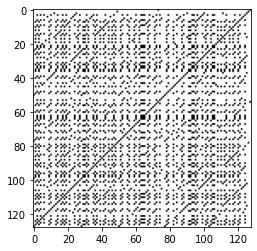

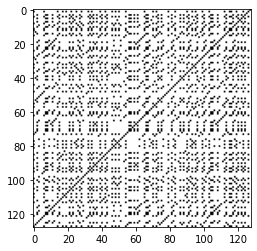

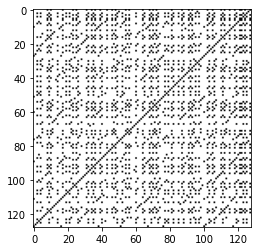

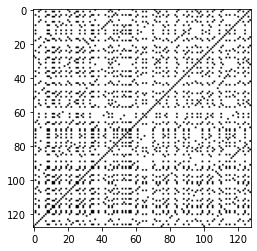

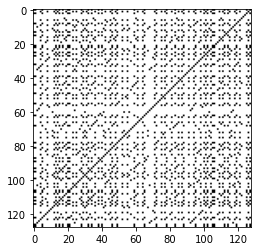

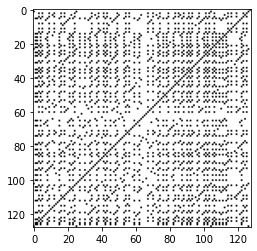

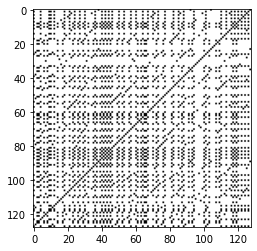

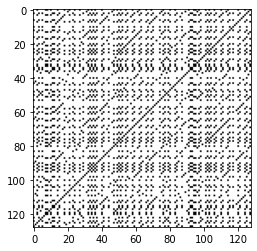

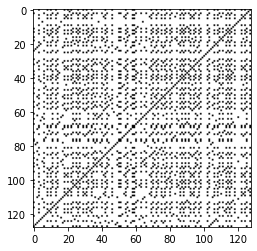

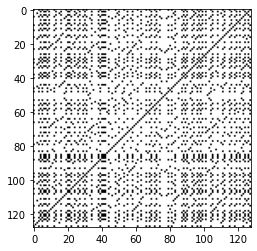

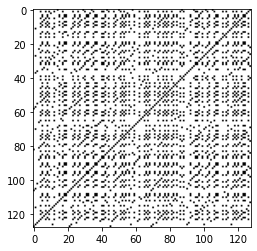

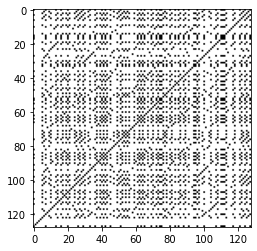

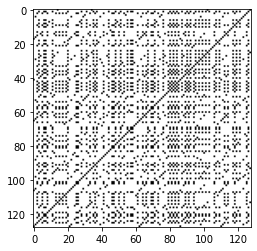

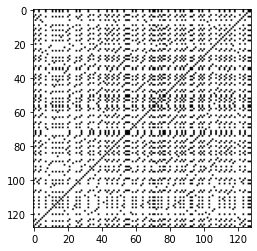

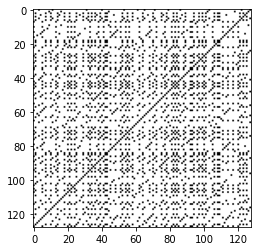

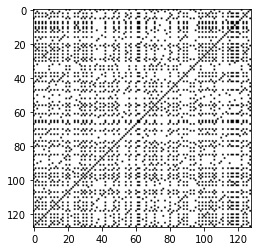

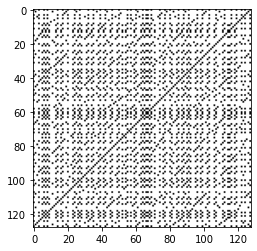

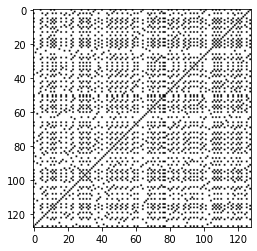

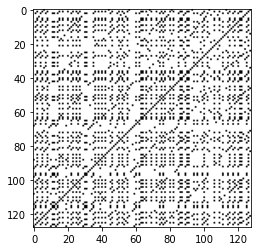

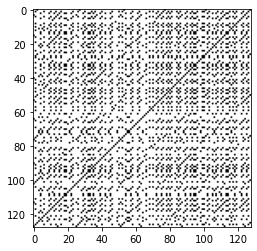

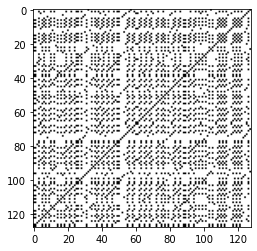

In [1]:
all_ids=['0CF00400', '0CF00300', '18FEF100', '1CFF6F00', '18ECFF00', '18FF8800', '18FF8400',
           '18FEE500', '18F00029', '18FEF200', '18FF7F00', '1CFF7100', '18EBFF00', '18FF8200',
           '18FF8600', '18FEDC00', '1CFF7700', '18FF8900', '18FEDF00', '18FEE900', '18FF8700',
           '18FEE700', '1CFEB300', '18FEC100', '18FEEE00', '18ECFF29', '18EBFF29', '0C000027',
           '0C000F27', '18FEF111', '0CF00203', '0CF00327', '18FF8327', '0C002927', '18FF5027',
           '18F00503', '18FF5127', '18FEED11', '18FEE617', '1CFFAA27', '18EC0027', '18EB0027']

data=open('datasets/prepared_attacks/drop_attack_0.001.txt','r')
counter = 0
max_index=127
id_sequence = []
matrix=[]
row = []

trial=0
for line in data:
    counter = counter + 1  # for counting the numbers of data sets , this should be here for synchronization
    arb_id=line[25:33]
    id_sequence.append(all_ids.index(arb_id))
    if counter > max_index:
        for i in id_sequence:
            for j in reversed(id_sequence):
                row.append(1) if i == j else row.append(0)
            matrix.append(row)
            row = []
        import matplotlib.pyplot as plt
        import numpy as np
        plt.imshow(np.array(matrix),cmap='binary')
        plt.show()
        id_sequence = []
        matrix = []
        counter = 0
        trial=trial+1
        if trial >20:
            break
data.close()



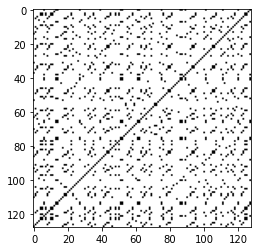

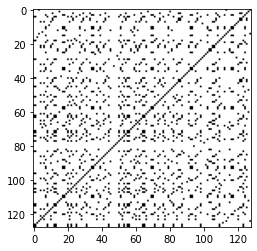

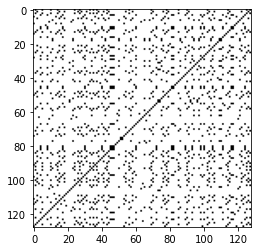

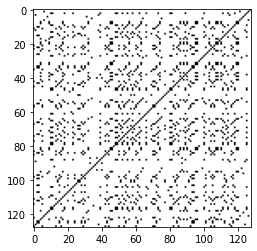

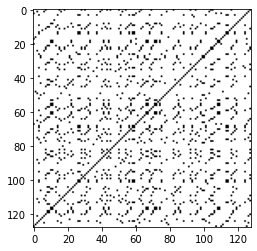

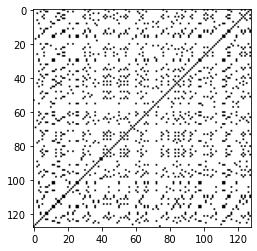

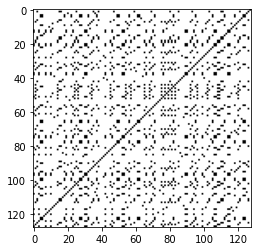

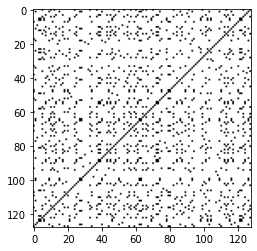

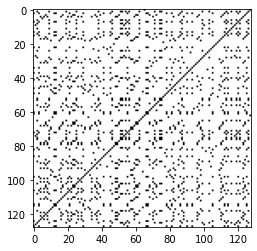

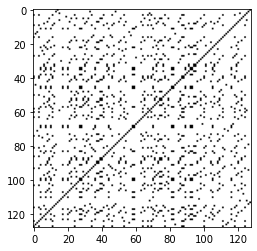

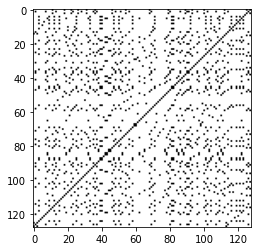

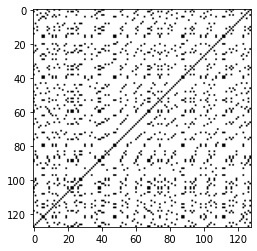

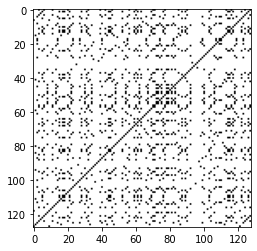

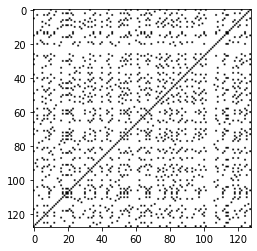

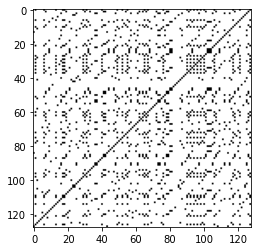

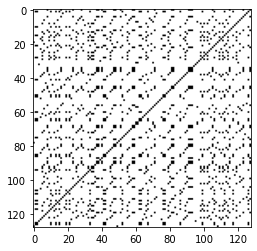

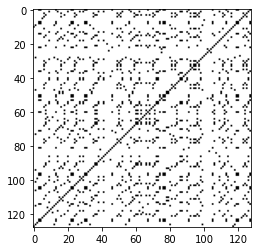

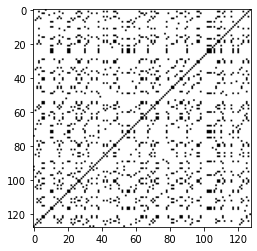

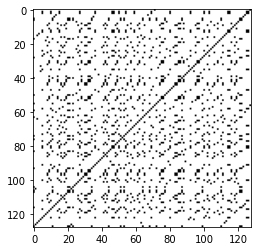

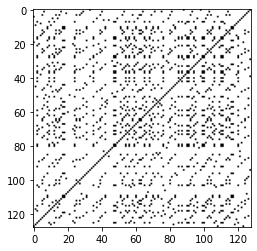

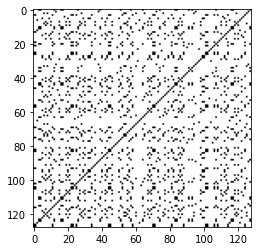

In [2]:
all_ids=['0CF00400', '0CF00300', '18FEF100', '1CFF6F00', '18ECFF00', '18FF8800', '18FF8400',
           '18FEE500', '18F00029', '18FEF200', '18FF7F00', '1CFF7100', '18EBFF00', '18FF8200',
           '18FF8600', '18FEDC00', '1CFF7700', '18FF8900', '18FEDF00', '18FEE900', '18FF8700',
           '18FEE700', '1CFEB300', '18FEC100', '18FEEE00', '18ECFF29', '18EBFF29', '0C000027',
           '0C000F27', '18FEF111', '0CF00203', '0CF00327', '18FF8327', '0C002927', '18FF5027',
           '18F00503', '18FF5127', '18FEED11', '18FEE617', '1CFFAA27', '18EC0027', '18EB0027']

data=open('datasets/prepared_attacks/fuzzy_attack_0.001.txt','r')
counter = 0
max_index=127
id_sequence = []
matrix=[]
row = []

trial=0
for line in data:
    counter = counter + 1  # for counting the numbers of data sets , this should be here for synchronization
    arb_id=line[25:33]
    id_sequence.append(all_ids.index(arb_id) if arb_id in all_ids else all_ids.append(-1))
    if counter > max_index:
        for i in id_sequence:
            for j in reversed(id_sequence):
                row.append(1) if i == j else row.append(0)
            matrix.append(row)
            row = []
        import matplotlib.pyplot as plt
        import numpy as np
        plt.imshow(np.array(matrix),cmap='binary')
        plt.show()
        id_sequence = []
        matrix = []
        counter = 0
        trial=trial+1
        if trial >20:
            break
data.close()



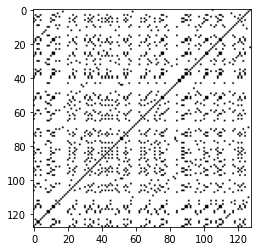

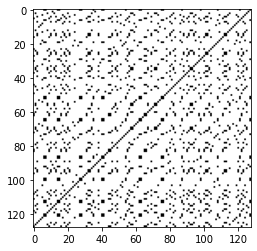

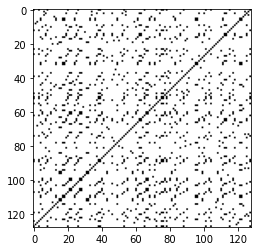

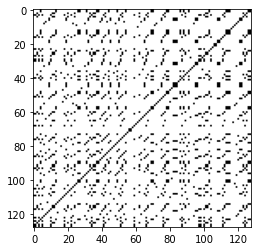

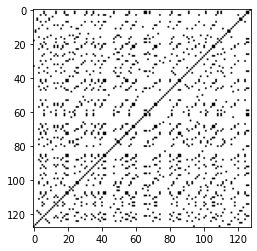

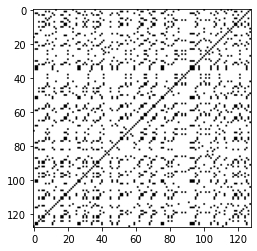

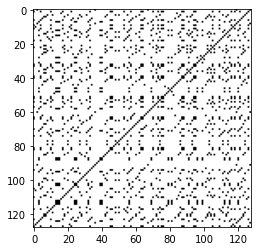

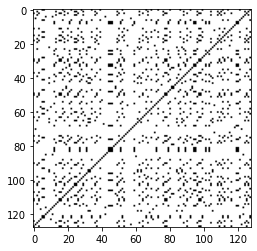

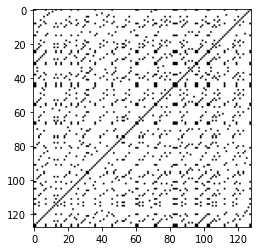

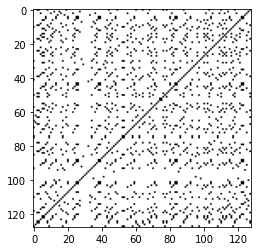

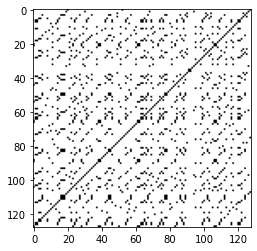

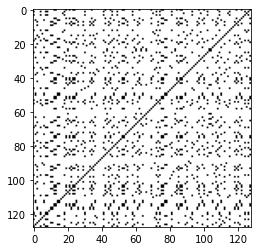

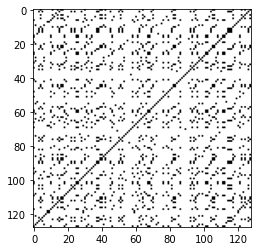

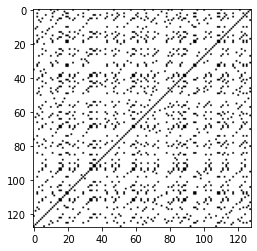

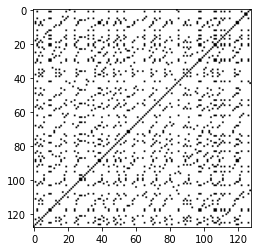

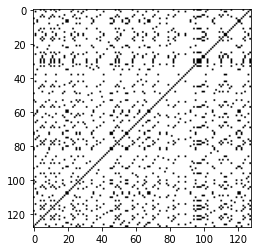

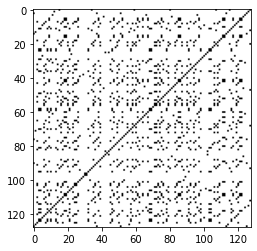

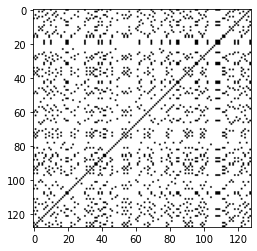

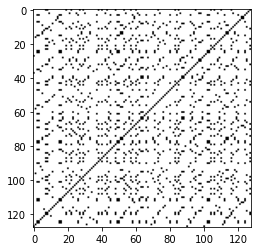

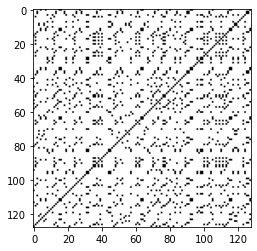

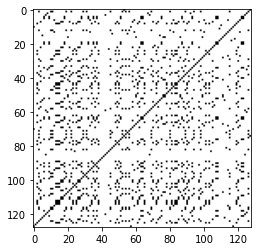

In [3]:
all_ids=['0CF00400', '0CF00300', '18FEF100', '1CFF6F00', '18ECFF00', '18FF8800', '18FF8400',
           '18FEE500', '18F00029', '18FEF200', '18FF7F00', '1CFF7100', '18EBFF00', '18FF8200',
           '18FF8600', '18FEDC00', '1CFF7700', '18FF8900', '18FEDF00', '18FEE900', '18FF8700',
           '18FEE700', '1CFEB300', '18FEC100', '18FEEE00', '18ECFF29', '18EBFF29', '0C000027',
           '0C000F27', '18FEF111', '0CF00203', '0CF00327', '18FF8327', '0C002927', '18FF5027',
           '18F00503', '18FF5127', '18FEED11', '18FEE617', '1CFFAA27', '18EC0027', '18EB0027']

data=open('datasets/prepared_attacks/insertion_attack_0.001.txt','r')
counter = 0
max_index=127
id_sequence = []
matrix=[]
row = []

trial=0
for line in data:
    counter = counter + 1  # for counting the numbers of data sets , this should be here for synchronization
    arb_id=line[25:33]
    id_sequence.append(all_ids.index(arb_id) if arb_id in all_ids else all_ids.append(-1))
    if counter > max_index:
        for i in id_sequence:
            for j in reversed(id_sequence):
                row.append(1) if i == j else row.append(0)
            matrix.append(row)
            row = []
        import matplotlib.pyplot as plt
        import numpy as np
        plt.imshow(np.array(matrix),cmap='binary')
        plt.show()
        id_sequence = []
        matrix = []
        counter = 0
        trial=trial+1
        if trial >20:
            break
data.close()

